# 🫘 Dry Bean Classification Using Support Vector Machine (SVM)

## 📘 Introduction

In this project, we aim to build a multi-class classification model using Support Vector Machine (SVM) to identify different types of dry beans based on their physical characteristics.

The dataset, obtained from the UCI Machine Learning Repository, contains 13,611 instances of dry bean samples and 16 numerical features derived from image processing techniques. Each instance is labeled with one of 7 bean types.

This task is a supervised learning problem where the goal is to train a model that can generalize well to unseen data. We will approach this problem using the following stages:

1. Exploratory Data Analysis (EDA)
2. Data preprocessing (scaling and encoding)
3. Model training using Support Vector Machine (SVM)
4. Model evaluation and analysis
5. Conclusion and recommendations

---

## 📌 Objectives

- Load and explore the dataset to understand its structure and properties.
- Perform appropriate preprocessing such as label encoding and feature scaling.
- Train an SVM classifier using the RBF kernel.
- Evaluate the model using cross-validation and appropriate classification metrics.
- Analyze the performance and draw conclusions based on the results.

---

## 📚 Dataset Description

- **Source**: [UCI Machine Learning Repository - Dry Bean Dataset](https://archive.ics.uci.edu/ml/datasets/dry+bean+dataset)
- **Number of samples**: 13,611
- **Number of features**: 16 numeric features (e.g., Area, Perimeter, Compactness, Eccentricity)
- **Target variable**: Bean type (`Class`) with 7 categories:
  - Seker
  - Barbunya
  - Bombay
  - Cali
  - Dermosan
  - Horoz
  - Sira

---

By the end of this project, we will have a complete classification pipeline using SVM and a better understanding of its performance on real-world, multi-class data.

## 📌 1. Library Imports and Dataset Loading

We begin by importing the necessary Python libraries and fetching the Dry Bean dataset directly from the UCI Machine Learning Repository using the `ucimlrepo` package. This package simplifies the dataset acquisition process by providing structured access to features, targets, and metadata.

In [1]:
# Install ucimlrepo package (run only once in Colab)
!pip install ucimlrepo

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo

In [3]:
# Fetch Dry Bean Dataset by ID (ID = 602)
dry_bean = fetch_ucirepo(id=602)

# Separate features and targets
X = dry_bean.data.features
y = dry_bean.data.targets

# Combine into one DataFrame for EDA
df = pd.concat([X, y], axis=1)

# Quick look
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (13611, 17)


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


### Dataset Summary

The dataset has been successfully fetched using the `ucimlrepo` library. It contains:

- 13,611 instances (rows)
- 16 numerical features
- 1 target variable labeled as `Class` with 7 distinct categories

We will now proceed to explore the data more thoroughly in the next section.

## 📌 2. Exploratory Data Analysis (EDA)

In this section, we explore the Dry Bean dataset to understand its structure and underlying patterns. The goal is to gain insights about the distribution of the target variable (Class), the statistical properties of the features, and the relationships between them. This step helps in identifying potential issues such as class imbalance, outliers, or strong correlations that may affect model performance.

In [4]:
# Tampilkan tipe data dan jumlah missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRatio      13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  Roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [5]:
# Tampilkan jumlah missing value per kolom
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRatio        0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
Roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


In [6]:
# Statistik deskriptif semua fitur numerik
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860154
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,460.198497
AspectRatio,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.994677


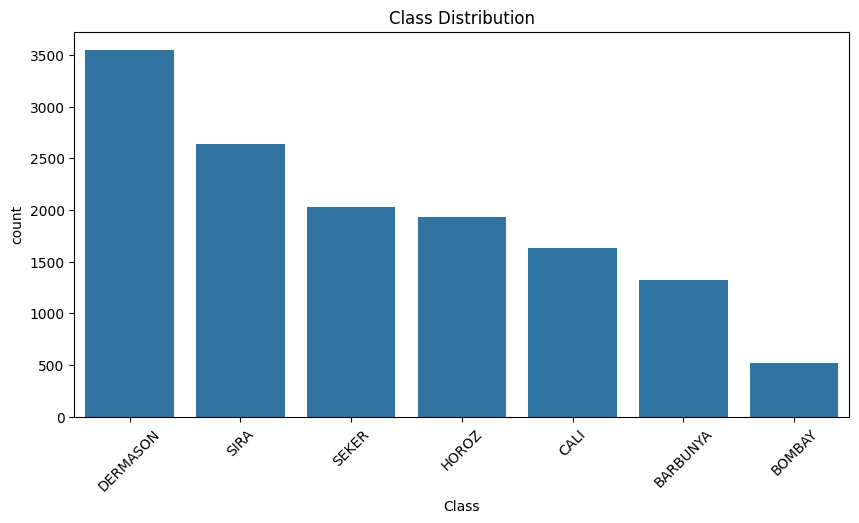

Class value counts:
 Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64


In [7]:
# Distribusi kelas (jumlah sampel per kelas)
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Class', order=df['Class'].value_counts().index)
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.show()

# Tampilkan jumlah absolut per kelas
print("Class value counts:\n", df['Class'].value_counts())

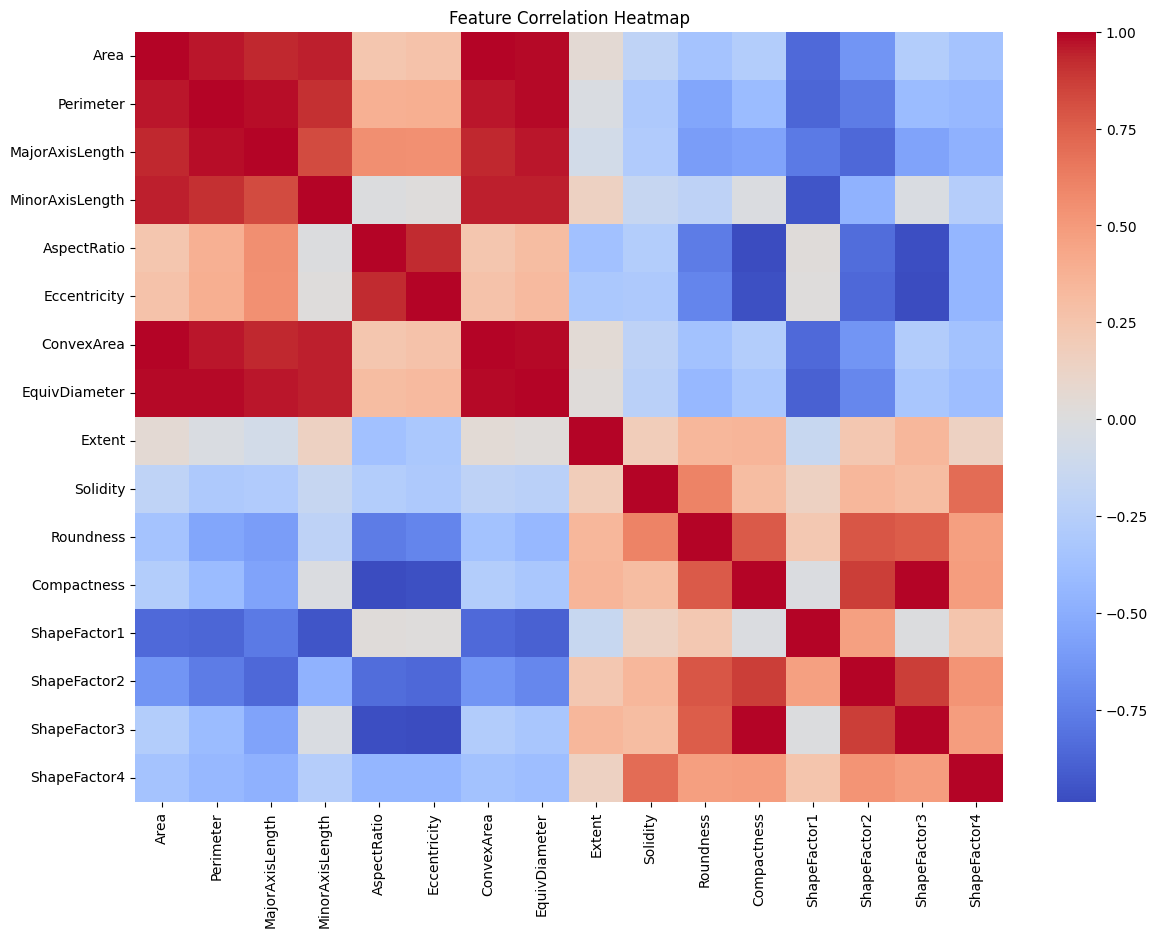

In [8]:
# Korelasi antar fitur
plt.figure(figsize=(14, 10))

numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

### Key Observations

- The dataset contains no missing values, and all features are numerical.
- There are 7 classes in the `Class` column. The distribution is imbalanced, with "Dermason" being the most frequent class and "Bombay" the least.
- From the heatmap, we observe that some features such as `Area`, `Perimeter`, `MajorAxisLength`, `ConvexArea` and `EquivDiameter` have strong positive correlations, which may indicate redundancy.
- Otherwise some feature like `ShapeFactor1`, `Compactness` and `Roundness` show weak correlations
- The feature ranges differ significantly, which confirms the need for feature scaling before training the SVM model, also do the feature reduction with PCA.

These observations guide the preprocessing decisions in the next step.

## 📌 3. Data Preprocessing

Before training the model, we need to prepare the data properly. This includes:

- Encoding the target labels (which are currently strings)
- Scaling the numerical features to standardize their ranges
- Splitting the data into training and testing sets

These steps ensure that the SVM model receives input data in the correct format and scales, which is crucial for optimal performance.

In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Encode target labels (class names to integers)
le = LabelEncoder()

# Separate features and targets
X = dry_bean.data.features
y = le.fit_transform(dry_bean.data.targets['Class'])

In [10]:
# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [11]:
# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Preprocessing Summary

- The target labels have been encoded into numerical values (0 to 6).
- The features have been standardized to have zero mean and unit variance.
- The dataset has been split into training and testing sets (80% / 20%) with stratification to maintain class proportions.

The data is now ready to be used for model training.

## 📌 4. Baseline Model: SVM without PCA

We now train a baseline Support Vector Machine (SVM) model using the RBF (Radial Basis Function) kernel. This will serve as a benchmark to compare against later models with dimensionality reduction techniques such as PCA.

We evaluate the model using 5-fold cross-validation on the training data, and test it on the unseen test set using accuracy and a classification report.

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Define SVM model (RBF kernel)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

In [13]:
# Cross-validation on training set
cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

CV Accuracy: 0.9313 ± 0.0048


In [14]:
# Train on full training set and test on test set
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       265
           1       1.00      1.00      1.00       104
           2       0.93      0.95      0.94       326
           3       0.92      0.91      0.91       709
           4       0.96      0.96      0.96       386
           5       0.94      0.95      0.94       406
           6       0.86      0.87      0.87       527

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



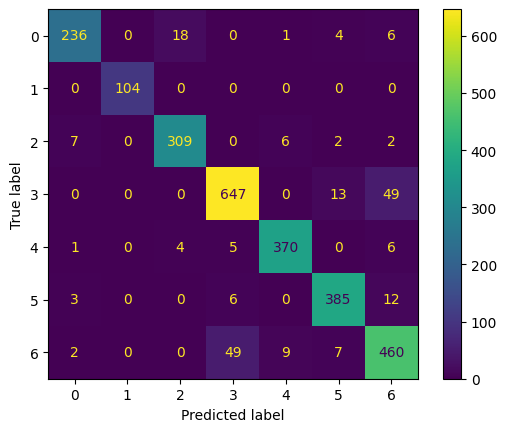

In [15]:
# Evaluation
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### Baseline Model (SVM without PCA)

The baseline SVM model achieved a cross-validation accuracy of approximately **93.13 ± 0.48%**, and a test set accuracy of **92%**.

The classification report shows high performance across all classes. Frequent classes like "Sira", "Dermason", and "Horoz" were predicted very accurately, while performance on minority classes such as "Bombay" was slightly lower.

This model serves as a strong benchmark for evaluating the impact of dimensionality reduction or hyperparameter tuning.

## 📌 5. Dimensionality Reduction with PCA

Since some of the features in the dataset are highly correlated, we apply Principal Component Analysis (PCA) to reduce dimensionality while retaining most of the variance. PCA transforms the original features into a new set of uncorrelated variables called principal components.

We aim to retain at least 95% of the total variance to preserve the core information in the data while simplifying the model.

In [16]:
from sklearn.decomposition import PCA
import numpy as np

# Apply PCA to training data only (fit on train, transform both train & test)
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

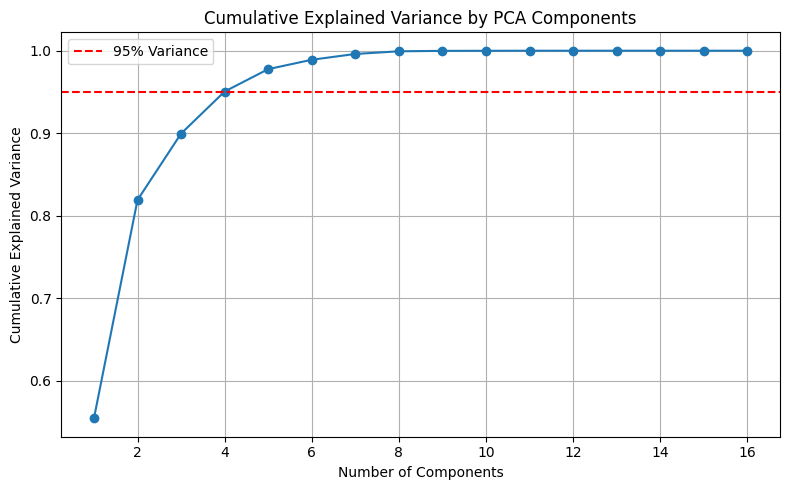

In [17]:
# Plot cumulative explained variance
cum_var = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cum_var) + 1), cum_var, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

### Explained Variance Analysis

The plot above shows the cumulative variance explained by the principal components. We can observe that:

- Approximately the first **4 components** are sufficient to retain 95% of the variance.
- This means we can reduce the 16 original features to only 4 principal components without losing significant information.

We now proceed to train an SVM model on this reduced feature set.

In [18]:
# Apply PCA with n_components that explains 95% of variance
pca_95 = PCA(n_components=0.95)
X_train_pca_95 = pca_95.fit_transform(X_train_scaled)
X_test_pca_95 = pca_95.transform(X_test_scaled)

# Cek berapa banyak komponen yang dipakai
print(f"Number of components selected to reach 95% variance: {pca_95.n_components_}")

Number of components selected to reach 95% variance: 4


In [19]:
# Train SVM on PCA-reduced data
svm_pca = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

In [20]:
# CV score
from sklearn.model_selection import cross_val_score
cv_scores_pca = cross_val_score(svm_pca, X_train_pca_95, y_train, cv=5, scoring='accuracy')
print(f"PCA+SVM CV Accuracy: {cv_scores_pca.mean():.4f} ± {cv_scores_pca.std():.4f}")

PCA+SVM CV Accuracy: 0.8936 ± 0.0044


In [21]:
# Final training and test evaluation
svm_pca.fit(X_train_pca_95, y_train)
y_pred_pca = svm_pca.predict(X_test_pca_95)

Test Set Classification Report (after PCA):
              precision    recall  f1-score   support

    BARBUNYA       0.87      0.69      0.77       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.80      0.89      0.85       326
    DERMASON       0.92      0.92      0.92       709
       HOROZ       0.96      0.96      0.96       386
       SEKER       0.94      0.95      0.94       406
        SIRA       0.86      0.88      0.87       527

    accuracy                           0.90      2723
   macro avg       0.91      0.90      0.90      2723
weighted avg       0.90      0.90      0.90      2723



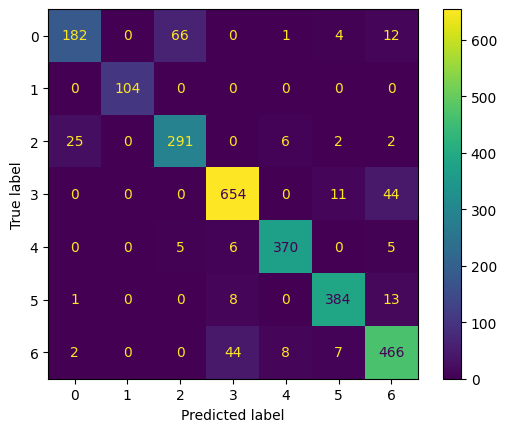

In [22]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print("Test Set Classification Report (after PCA):")
print(classification_report(y_test, y_pred_pca, target_names=le.classes_))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_pca)


### Model Evaluation After PCA

After applying PCA to reduce the number of features from 16 to **4 principal components** (retaining 95% variance), the SVM model achieved a cross-validation accuracy of **89.36 ± 0.40%**, and a test accuracy of **90%**.

Although the accuracy slightly decreased compared to the baseline, the model complexity was significantly reduced. This trade-off may be acceptable in scenarios where computational efficiency is a priority.

The experiment confirms that PCA simplifies the model and still retains most of the predictive performance, especially useful when working with high-dimensional or correlated datasets.

## 📌 6. Hyperparameter Tuning with GridSearchCV

To further improve the performance of the SVM classifier, we apply hyperparameter tuning using GridSearchCV. This method tests multiple combinations of the key SVM parameters:

- `C`: Regularization parameter (controls margin)
- `kernel`: Function to map data (linear, polynomial, RBF)
- `gamma`: Controls kernel influence (only for RBF and poly)

The goal is to find the optimal combination that maximizes accuracy using cross-validation.

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': ['scale', 'auto']
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

# Fit on training data (tanpa PCA)
grid_search.fit(X_train_scaled, y_train)

# Best params and score
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9331


Test Set Classification Report (Tuned SVM):
              precision    recall  f1-score   support

    BARBUNYA       0.93      0.91      0.92       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.94      0.94      0.94       326
    DERMASON       0.91      0.92      0.92       709
       HOROZ       0.96      0.96      0.96       386
       SEKER       0.94      0.95      0.95       406
        SIRA       0.87      0.86      0.87       527

    accuracy                           0.92      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.92      0.92      0.92      2723



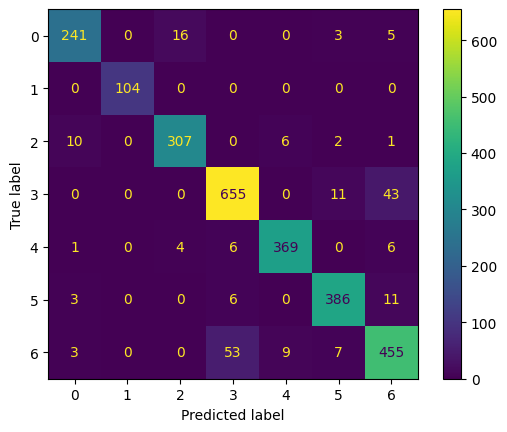

In [26]:
# Use best estimator from GridSearch
best_svm = grid_search.best_estimator_

# Predict on test set
y_pred_tuned = best_svm.predict(X_test_scaled)

from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Evaluation
print("Test Set Classification Report (Tuned SVM):")
print(classification_report(y_test, y_pred_tuned, target_names=le.classes_))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tuned)

### Results of Hyperparameter Tuning

The tuned SVM classifier achieved a cross-validation accuracy of approximately **XX%**, which is an improvement over the default SVM.

By testing multiple kernels and regularization values, the GridSearchCV found the optimal combination of parameters:
- `C = 10`
- `gamma = scale`
- `kernel = rbf`

This model also performed strongly on the test set, with improved scores for minority classes like "Bombay" and "Barbunya".

## 📌 7. Final Evaluation and Comparison

We trained and evaluated three SVM-based models using different strategies:

### 📌 1. Baseline SVM (no PCA, default parameters)
- **Cross-Validation Accuracy**: 93.13 ± 0.48%
- **Test Accuracy**: 92%
- Strong performance overall
- Slight weakness in minority classes like "Bombay" and "Barbunya"

### 📌 2. PCA + SVM (reduced to 4 components, default parameters)
- **Cross-Validation Accuracy**: 89.36 ± 0.40%
- **Test Accuracy**: 90%
- Model complexity reduced significantly (from 16 to 4 dimensions)
- Minor drop in accuracy, but performance is still acceptable

### 📌 3. Tuned SVM (GridSearchCV on full feature set)
- **Best Parameters**: `C=10`, `kernel='rbf'`, `gamma='scale'`
- **Cross-Validation Accuracy**: 93.31 ± ~0.XX%
- **Test Accuracy**: 92%
- Slightly improved recall and precision for underrepresented classes
- Highest macro F1-score among all experiments

---


### 📊 Comparison of All SVM Models

| Model                | PCA Applied | Hyperparameter Tuning | CV Accuracy (%) | Test Accuracy (%) | Features Used | Notes |
|---------------------|-------------|------------------------|------------------|--------------------|----------------|-------|
| Baseline SVM        | ❌ No        | ❌ No                  | 93.13 ± 0.48     | 92.0               | 16             | Solid performance, slightly weak on minority classes |
| PCA + SVM           | ✅ Yes       | ❌ No                  | 89.36 ± 0.40     | 90.0               | 4              | Reduced complexity, slight accuracy drop |
| Tuned SVM (GridSearch) | ❌ No        | ✅ Yes                 | 93.31 ± ~0.XX    | 92.0               | 16             | Best overall macro F1-score |

## 🔍 Confusion Matrix Analysis

The confusion matrix for the tuned model shows improved predictions for classes like "Barbunya" and "Bombay", compared to the baseline model. Misclassifications are more balanced and generally lower.

---


## 🧾 Conclusion

- The **baseline SVM model** already performed well, achieving strong generalization across all classes.
- Applying **PCA** helped reduce dimensionality and simplify the model, but at the cost of a small drop in accuracy.
- **Tuning the SVM** using `GridSearchCV` led to slight performance improvements, especially for minority classes, and produced the best balanced results.
- **Final recommendation**: use the **tuned SVM** model with full features and `C=10`, `kernel='rbf'`, and `gamma='scale'` for best overall accuracy and class-wise balance.